In [1]:
!pip install torch
!pip install torchvision
!pip install kaggle
!pip install matplotlib
!pip install spacy
!pip install pandas

# English tokenizer data
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 kB 8.6 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.14-py3-none-any.whl size=105124 sha256=17aa063561afc7c817a0dfc2ed94a03faa1151978893a52830cc7b397bc769ad
  Stored in directory: /root/.cache/pip/wheels/ec/d9/04/93be57edf3835182a8e76d8ff87f7e77a0113f473ba3721ee0
Successfully built kaggle
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.6.20
    Uninstalling certifi-2020.6.20:
      Successfully uninstalled certifi-2020.6.20
2024-06-27 18:13:10.200424: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 18:13:10.200537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: A

In [2]:
# Used for model
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Used to format data
import torchvision
import torchvision.transforms as transforms
# Used to show results
import matplotlib.pyplot as plt

# Used to download data
import os
#import kaggle
import zipfile
from pathlib import Path

# Additional file imports
from image_captioning_from_scratch import CNNtoRNN
from dataset import Flickr8kDataset
from dataset import Collate

# Used to convert test images
from PIL import Image

2024-06-27 18:13:34.944745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 18:13:34.944745: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 18:13:34.947919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 18:13:34.959961: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 18:13:36.961755: W tensorflow/compiler/tf2

In [3]:
# Displays an image with its respective caption
def displayImage(img, caption):
    plt.figure()
    plt.imshow(img.permute(1,2,0))
    plt.title(caption)
    plt.axis("off")

In [4]:
# Data transformations
transform = transforms.Compose(
    [
        transforms.Resize((512,512)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

# Load dataset
dataset_path = "./dataset/"
root = os.path.join(dataset_path, 'Images')
annotations = os.path.join(dataset_path, 'captions.txt')
freq_threshold = 4
dataset = Flickr8kDataset(root, annotations, transform, freq_threshold)

# Get device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Parameters
embed_size = 300
decoder_dim = 512
attention_dim = 256
vocab_size = 4091
p = 0.5
# Load trained model
checkpoint =  torch.load("./models/NewModel3|Epoch:5.pth", map_location=device)
model = CNNtoRNN(embed_size, decoder_dim, attention_dim, vocab_size, p).to(device)
model.load_state_dict(checkpoint['state_dict'])

# Test image transforms
test_transform = transforms.Compose(
    [
        transforms.Resize((512,512)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)



Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 77.6MB/s] 


RuntimeError: Error(s) in loading state_dict for CNNtoRNN:
	Missing key(s) in state_dict: "encoderCNN.inception.0.conv.weight", "encoderCNN.inception.0.bn.weight", "encoderCNN.inception.0.bn.bias", "encoderCNN.inception.0.bn.running_mean", "encoderCNN.inception.0.bn.running_var", "encoderCNN.inception.1.conv.weight", "encoderCNN.inception.1.bn.weight", "encoderCNN.inception.1.bn.bias", "encoderCNN.inception.1.bn.running_mean", "encoderCNN.inception.1.bn.running_var", "encoderCNN.inception.2.conv.weight", "encoderCNN.inception.2.bn.weight", "encoderCNN.inception.2.bn.bias", "encoderCNN.inception.2.bn.running_mean", "encoderCNN.inception.2.bn.running_var", "encoderCNN.inception.4.conv.weight", "encoderCNN.inception.4.bn.weight", "encoderCNN.inception.4.bn.bias", "encoderCNN.inception.4.bn.running_mean", "encoderCNN.inception.4.bn.running_var", "encoderCNN.inception.5.conv.weight", "encoderCNN.inception.5.bn.weight", "encoderCNN.inception.5.bn.bias", "encoderCNN.inception.5.bn.running_mean", "encoderCNN.inception.5.bn.running_var", "encoderCNN.inception.7.branch1x1.conv.weight", "encoderCNN.inception.7.branch1x1.bn.weight", "encoderCNN.inception.7.branch1x1.bn.bias", "encoderCNN.inception.7.branch1x1.bn.running_mean", "encoderCNN.inception.7.branch1x1.bn.running_var", "encoderCNN.inception.7.branch5x5_1.conv.weight", "encoderCNN.inception.7.branch5x5_1.bn.weight", "encoderCNN.inception.7.branch5x5_1.bn.bias", "encoderCNN.inception.7.branch5x5_1.bn.running_mean", "encoderCNN.inception.7.branch5x5_1.bn.running_var", "encoderCNN.inception.7.branch5x5_2.conv.weight", "encoderCNN.inception.7.branch5x5_2.bn.weight", "encoderCNN.inception.7.branch5x5_2.bn.bias", "encoderCNN.inception.7.branch5x5_2.bn.running_mean", "encoderCNN.inception.7.branch5x5_2.bn.running_var", "encoderCNN.inception.7.branch3x3dbl_1.conv.weight", "encoderCNN.inception.7.branch3x3dbl_1.bn.weight", "encoderCNN.inception.7.branch3x3dbl_1.bn.bias", "encoderCNN.inception.7.branch3x3dbl_1.bn.running_mean", "encoderCNN.inception.7.branch3x3dbl_1.bn.running_var", "encoderCNN.inception.7.branch3x3dbl_2.conv.weight", "encoderCNN.inception.7.branch3x3dbl_2.bn.weight", "encoderCNN.inception.7.branch3x3dbl_2.bn.bias", "encoderCNN.inception.7.branch3x3dbl_2.bn.running_mean", "encoderCNN.inception.7.branch3x3dbl_2.bn.running_var", "encoderCNN.inception.7.branch3x3dbl_3.conv.weight", "encoderCNN.inception.7.branch3x3dbl_3.bn.weight", "encoderCNN.inception.7.branch3x3dbl_3.bn.bias", "encoderCNN.inception.7.branch3x3dbl_3.bn.running_mean", "encoderCNN.inception.7.branch3x3dbl_3.bn.running_var", "encoderCNN.inception.7.branch_pool.conv.weight", "encoderCNN.inception.7.branch_pool.bn.weight", "encoderCNN.inception.7.branch_pool.bn.bias", "encoderCNN.inception.7.branch_pool.bn.running_mean", "encoderCNN.inception.7.branch_pool.bn.running_var", "encoderCNN.inception.8.branch1x1.conv.weight", "encoderCNN.inception.8.branch1x1.bn.weight", "encoderCNN.inception.8.branch1x1.bn.bias", "encoderCNN.inception.8.branch1x1.bn.running_mean", "encoderCNN.inception.8.branch1x1.bn.running_var", "encoderCNN.inception.8.branch5x5_1.conv.weight", "encoderCNN.inception.8.branch5x5_1.bn.weight", "encoderCNN.inception.8.branch5x5_1.bn.bias", "encoderCNN.inception.8.branch5x5_1.bn.running_mean", "encoderCNN.inception.8.branch5x5_1.bn.running_var", "encoderCNN.inception.8.branch5x5_2.conv.weight", "encoderCNN.inception.8.branch5x5_2.bn.weight", "encoderCNN.inception.8.branch5x5_2.bn.bias", "encoderCNN.inception.8.branch5x5_2.bn.running_mean", "encoderCNN.inception.8.branch5x5_2.bn.running_var", "encoderCNN.inception.8.branch3x3dbl_1.conv.weight", "encoderCNN.inception.8.branch3x3dbl_1.bn.weight", "encoderCNN.inception.8.branch3x3dbl_1.bn.bias", "encoderCNN.inception.8.branch3x3dbl_1.bn.running_mean", "encoderCNN.inception.8.branch3x3dbl_1.bn.running_var", "encoderCNN.inception.8.branch3x3dbl_2.conv.weight", "encoderCNN.inception.8.branch3x3dbl_2.bn.weight", "encoderCNN.inception.8.branch3x3dbl_2.bn.bias", "encoderCNN.inception.8.branch3x3dbl_2.bn.running_mean", "encoderCNN.inception.8.branch3x3dbl_2.bn.running_var", "encoderCNN.inception.8.branch3x3dbl_3.conv.weight", "encoderCNN.inception.8.branch3x3dbl_3.bn.weight", "encoderCNN.inception.8.branch3x3dbl_3.bn.bias", "encoderCNN.inception.8.branch3x3dbl_3.bn.running_mean", "encoderCNN.inception.8.branch3x3dbl_3.bn.running_var", "encoderCNN.inception.8.branch_pool.conv.weight", "encoderCNN.inception.8.branch_pool.bn.weight", "encoderCNN.inception.8.branch_pool.bn.bias", "encoderCNN.inception.8.branch_pool.bn.running_mean", "encoderCNN.inception.8.branch_pool.bn.running_var", "encoderCNN.inception.9.branch1x1.conv.weight", "encoderCNN.inception.9.branch1x1.bn.weight", "encoderCNN.inception.9.branch1x1.bn.bias", "encoderCNN.inception.9.branch1x1.bn.running_mean", "encoderCNN.inception.9.branch1x1.bn.running_var", "encoderCNN.inception.9.branch5x5_1.conv.weight", "encoderCNN.inception.9.branch5x5_1.bn.weight", "encoderCNN.inception.9.branch5x5_1.bn.bias", "encoderCNN.inception.9.branch5x5_1.bn.running_mean", "encoderCNN.inception.9.branch5x5_1.bn.running_var", "encoderCNN.inception.9.branch5x5_2.conv.weight", "encoderCNN.inception.9.branch5x5_2.bn.weight", "encoderCNN.inception.9.branch5x5_2.bn.bias", "encoderCNN.inception.9.branch5x5_2.bn.running_mean", "encoderCNN.inception.9.branch5x5_2.bn.running_var", "encoderCNN.inception.9.branch3x3dbl_1.conv.weight", "encoderCNN.inception.9.branch3x3dbl_1.bn.weight", "encoderCNN.inception.9.branch3x3dbl_1.bn.bias", "encoderCNN.inception.9.branch3x3dbl_1.bn.running_mean", "encoderCNN.inception.9.branch3x3dbl_1.bn.running_var", "encoderCNN.inception.9.branch3x3dbl_2.conv.weight", "encoderCNN.inception.9.branch3x3dbl_2.bn.weight", "encoderCNN.inception.9.branch3x3dbl_2.bn.bias", "encoderCNN.inception.9.branch3x3dbl_2.bn.running_mean", "encoderCNN.inception.9.branch3x3dbl_2.bn.running_var", "encoderCNN.inception.9.branch3x3dbl_3.conv.weight", "encoderCNN.inception.9.branch3x3dbl_3.bn.weight", "encoderCNN.inception.9.branch3x3dbl_3.bn.bias", "encoderCNN.inception.9.branch3x3dbl_3.bn.running_mean", "encoderCNN.inception.9.branch3x3dbl_3.bn.running_var", "encoderCNN.inception.9.branch_pool.conv.weight", "encoderCNN.inception.9.branch_pool.bn.weight", "encoderCNN.inception.9.branch_pool.bn.bias", "encoderCNN.inception.9.branch_pool.bn.running_mean", "encoderCNN.inception.9.branch_pool.bn.running_var", "encoderCNN.inception.10.branch3x3.conv.weight", "encoderCNN.inception.10.branch3x3.bn.weight", "encoderCNN.inception.10.branch3x3.bn.bias", "encoderCNN.inception.10.branch3x3.bn.running_mean", "encoderCNN.inception.10.branch3x3.bn.running_var", "encoderCNN.inception.10.branch3x3dbl_1.conv.weight", "encoderCNN.inception.10.branch3x3dbl_1.bn.weight", "encoderCNN.inception.10.branch3x3dbl_1.bn.bias", "encoderCNN.inception.10.branch3x3dbl_1.bn.running_mean", "encoderCNN.inception.10.branch3x3dbl_1.bn.running_var", "encoderCNN.inception.10.branch3x3dbl_2.conv.weight", "encoderCNN.inception.10.branch3x3dbl_2.bn.weight", "encoderCNN.inception.10.branch3x3dbl_2.bn.bias", "encoderCNN.inception.10.branch3x3dbl_2.bn.running_mean", "encoderCNN.inception.10.branch3x3dbl_2.bn.running_var", "encoderCNN.inception.10.branch3x3dbl_3.conv.weight", "encoderCNN.inception.10.branch3x3dbl_3.bn.weight", "encoderCNN.inception.10.branch3x3dbl_3.bn.bias", "encoderCNN.inception.10.branch3x3dbl_3.bn.running_mean", "encoderCNN.inception.10.branch3x3dbl_3.bn.running_var", "encoderCNN.inception.11.branch1x1.conv.weight", "encoderCNN.inception.11.branch1x1.bn.weight", "encoderCNN.inception.11.branch1x1.bn.bias", "encoderCNN.inception.11.branch1x1.bn.running_mean", "encoderCNN.inception.11.branch1x1.bn.running_var", "encoderCNN.inception.11.branch7x7_1.conv.weight", "encoderCNN.inception.11.branch7x7_1.bn.weight", "encoderCNN.inception.11.branch7x7_1.bn.bias", "encoderCNN.inception.11.branch7x7_1.bn.running_mean", "encoderCNN.inception.11.branch7x7_1.bn.running_var", "encoderCNN.inception.11.branch7x7_2.conv.weight", "encoderCNN.inception.11.branch7x7_2.bn.weight", "encoderCNN.inception.11.branch7x7_2.bn.bias", "encoderCNN.inception.11.branch7x7_2.bn.running_mean", "encoderCNN.inception.11.branch7x7_2.bn.running_var", "encoderCNN.inception.11.branch7x7_3.conv.weight", "encoderCNN.inception.11.branch7x7_3.bn.weight", "encoderCNN.inception.11.branch7x7_3.bn.bias", "encoderCNN.inception.11.branch7x7_3.bn.running_mean", "encoderCNN.inception.11.branch7x7_3.bn.running_var", "encoderCNN.inception.11.branch7x7dbl_1.conv.weight", "encoderCNN.inception.11.branch7x7dbl_1.bn.weight", "encoderCNN.inception.11.branch7x7dbl_1.bn.bias", "encoderCNN.inception.11.branch7x7dbl_1.bn.running_mean", "encoderCNN.inception.11.branch7x7dbl_1.bn.running_var", "encoderCNN.inception.11.branch7x7dbl_2.conv.weight", "encoderCNN.inception.11.branch7x7dbl_2.bn.weight", "encoderCNN.inception.11.branch7x7dbl_2.bn.bias", "encoderCNN.inception.11.branch7x7dbl_2.bn.running_mean", "encoderCNN.inception.11.branch7x7dbl_2.bn.running_var", "encoderCNN.inception.11.branch7x7dbl_3.conv.weight", "encoderCNN.inception.11.branch7x7dbl_3.bn.weight", "encoderCNN.inception.11.branch7x7dbl_3.bn.bias", "encoderCNN.inception.11.branch7x7dbl_3.bn.running_mean", "encoderCNN.inception.11.branch7x7dbl_3.bn.running_var", "encoderCNN.inception.11.branch7x7dbl_4.conv.weight", "encoderCNN.inception.11.branch7x7dbl_4.bn.weight", "encoderCNN.inception.11.branch7x7dbl_4.bn.bias", "encoderCNN.inception.11.branch7x7dbl_4.bn.running_mean", "encoderCNN.inception.11.branch7x7dbl_4.bn.running_var", "encoderCNN.inception.11.branch7x7dbl_5.conv.weight", "encoderCNN.inception.11.branch7x7dbl_5.bn.weight", "encoderCNN.inception.11.branch7x7dbl_5.bn.bias", "encoderCNN.inception.11.branch7x7dbl_5.bn.running_mean", "encoderCNN.inception.11.branch7x7dbl_5.bn.running_var", "encoderCNN.inception.11.branch_pool.conv.weight", "encoderCNN.inception.11.branch_pool.bn.weight", "encoderCNN.inception.11.branch_pool.bn.bias", "encoderCNN.inception.11.branch_pool.bn.running_mean", "encoderCNN.inception.11.branch_pool.bn.running_var", "encoderCNN.inception.12.branch1x1.conv.weight", "encoderCNN.inception.12.branch1x1.bn.weight", "encoderCNN.inception.12.branch1x1.bn.bias", "encoderCNN.inception.12.branch1x1.bn.running_mean", "encoderCNN.inception.12.branch1x1.bn.running_var", "encoderCNN.inception.12.branch7x7_1.conv.weight", "encoderCNN.inception.12.branch7x7_1.bn.weight", "encoderCNN.inception.12.branch7x7_1.bn.bias", "encoderCNN.inception.12.branch7x7_1.bn.running_mean", "encoderCNN.inception.12.branch7x7_1.bn.running_var", "encoderCNN.inception.12.branch7x7_2.conv.weight", "encoderCNN.inception.12.branch7x7_2.bn.weight", "encoderCNN.inception.12.branch7x7_2.bn.bias", "encoderCNN.inception.12.branch7x7_2.bn.running_mean", "encoderCNN.inception.12.branch7x7_2.bn.running_var", "encoderCNN.inception.12.branch7x7_3.conv.weight", "encoderCNN.inception.12.branch7x7_3.bn.weight", "encoderCNN.inception.12.branch7x7_3.bn.bias", "encoderCNN.inception.12.branch7x7_3.bn.running_mean", "encoderCNN.inception.12.branch7x7_3.bn.running_var", "encoderCNN.inception.12.branch7x7dbl_1.conv.weight", "encoderCNN.inception.12.branch7x7dbl_1.bn.weight", "encoderCNN.inception.12.branch7x7dbl_1.bn.bias", "encoderCNN.inception.12.branch7x7dbl_1.bn.running_mean", "encoderCNN.inception.12.branch7x7dbl_1.bn.running_var", "encoderCNN.inception.12.branch7x7dbl_2.conv.weight", "encoderCNN.inception.12.branch7x7dbl_2.bn.weight", "encoderCNN.inception.12.branch7x7dbl_2.bn.bias", "encoderCNN.inception.12.branch7x7dbl_2.bn.running_mean", "encoderCNN.inception.12.branch7x7dbl_2.bn.running_var", "encoderCNN.inception.12.branch7x7dbl_3.conv.weight", "encoderCNN.inception.12.branch7x7dbl_3.bn.weight", "encoderCNN.inception.12.branch7x7dbl_3.bn.bias", "encoderCNN.inception.12.branch7x7dbl_3.bn.running_mean", "encoderCNN.inception.12.branch7x7dbl_3.bn.running_var", "encoderCNN.inception.12.branch7x7dbl_4.conv.weight", "encoderCNN.inception.12.branch7x7dbl_4.bn.weight", "encoderCNN.inception.12.branch7x7dbl_4.bn.bias", "encoderCNN.inception.12.branch7x7dbl_4.bn.running_mean", "encoderCNN.inception.12.branch7x7dbl_4.bn.running_var", "encoderCNN.inception.12.branch7x7dbl_5.conv.weight", "encoderCNN.inception.12.branch7x7dbl_5.bn.weight", "encoderCNN.inception.12.branch7x7dbl_5.bn.bias", "encoderCNN.inception.12.branch7x7dbl_5.bn.running_mean", "encoderCNN.inception.12.branch7x7dbl_5.bn.running_var", "encoderCNN.inception.12.branch_pool.conv.weight", "encoderCNN.inception.12.branch_pool.bn.weight", "encoderCNN.inception.12.branch_pool.bn.bias", "encoderCNN.inception.12.branch_pool.bn.running_mean", "encoderCNN.inception.12.branch_pool.bn.running_var", "encoderCNN.inception.13.branch1x1.conv.weight", "encoderCNN.inception.13.branch1x1.bn.weight", "encoderCNN.inception.13.branch1x1.bn.bias", "encoderCNN.inception.13.branch1x1.bn.running_mean", "encoderCNN.inception.13.branch1x1.bn.running_var", "encoderCNN.inception.13.branch7x7_1.conv.weight", "encoderCNN.inception.13.branch7x7_1.bn.weight", "encoderCNN.inception.13.branch7x7_1.bn.bias", "encoderCNN.inception.13.branch7x7_1.bn.running_mean", "encoderCNN.inception.13.branch7x7_1.bn.running_var", "encoderCNN.inception.13.branch7x7_2.conv.weight", "encoderCNN.inception.13.branch7x7_2.bn.weight", "encoderCNN.inception.13.branch7x7_2.bn.bias", "encoderCNN.inception.13.branch7x7_2.bn.running_mean", "encoderCNN.inception.13.branch7x7_2.bn.running_var", "encoderCNN.inception.13.branch7x7_3.conv.weight", "encoderCNN.inception.13.branch7x7_3.bn.weight", "encoderCNN.inception.13.branch7x7_3.bn.bias", "encoderCNN.inception.13.branch7x7_3.bn.running_mean", "encoderCNN.inception.13.branch7x7_3.bn.running_var", "encoderCNN.inception.13.branch7x7dbl_1.conv.weight", "encoderCNN.inception.13.branch7x7dbl_1.bn.weight", "encoderCNN.inception.13.branch7x7dbl_1.bn.bias", "encoderCNN.inception.13.branch7x7dbl_1.bn.running_mean", "encoderCNN.inception.13.branch7x7dbl_1.bn.running_var", "encoderCNN.inception.13.branch7x7dbl_2.conv.weight", "encoderCNN.inception.13.branch7x7dbl_2.bn.weight", "encoderCNN.inception.13.branch7x7dbl_2.bn.bias", "encoderCNN.inception.13.branch7x7dbl_2.bn.running_mean", "encoderCNN.inception.13.branch7x7dbl_2.bn.running_var", "encoderCNN.inception.13.branch7x7dbl_3.conv.weight", "encoderCNN.inception.13.branch7x7dbl_3.bn.weight", "encoderCNN.inception.13.branch7x7dbl_3.bn.bias", "encoderCNN.inception.13.branch7x7dbl_3.bn.running_mean", "encoderCNN.inception.13.branch7x7dbl_3.bn.running_var", "encoderCNN.inception.13.branch7x7dbl_4.conv.weight", "encoderCNN.inception.13.branch7x7dbl_4.bn.weight", "encoderCNN.inception.13.branch7x7dbl_4.bn.bias", "encoderCNN.inception.13.branch7x7dbl_4.bn.running_mean", "encoderCNN.inception.13.branch7x7dbl_4.bn.running_var", "encoderCNN.inception.13.branch7x7dbl_5.conv.weight", "encoderCNN.inception.13.branch7x7dbl_5.bn.weight", "encoderCNN.inception.13.branch7x7dbl_5.bn.bias", "encoderCNN.inception.13.branch7x7dbl_5.bn.running_mean", "encoderCNN.inception.13.branch7x7dbl_5.bn.running_var", "encoderCNN.inception.13.branch_pool.conv.weight", "encoderCNN.inception.13.branch_pool.bn.weight", "encoderCNN.inception.13.branch_pool.bn.bias", "encoderCNN.inception.13.branch_pool.bn.running_mean", "encoderCNN.inception.13.branch_pool.bn.running_var", "encoderCNN.inception.14.branch1x1.conv.weight", "encoderCNN.inception.14.branch1x1.bn.weight", "encoderCNN.inception.14.branch1x1.bn.bias", "encoderCNN.inception.14.branch1x1.bn.running_mean", "encoderCNN.inception.14.branch1x1.bn.running_var", "encoderCNN.inception.14.branch7x7_1.conv.weight", "encoderCNN.inception.14.branch7x7_1.bn.weight", "encoderCNN.inception.14.branch7x7_1.bn.bias", "encoderCNN.inception.14.branch7x7_1.bn.running_mean", "encoderCNN.inception.14.branch7x7_1.bn.running_var", "encoderCNN.inception.14.branch7x7_2.conv.weight", "encoderCNN.inception.14.branch7x7_2.bn.weight", "encoderCNN.inception.14.branch7x7_2.bn.bias", "encoderCNN.inception.14.branch7x7_2.bn.running_mean", "encoderCNN.inception.14.branch7x7_2.bn.running_var", "encoderCNN.inception.14.branch7x7_3.conv.weight", "encoderCNN.inception.14.branch7x7_3.bn.weight", "encoderCNN.inception.14.branch7x7_3.bn.bias", "encoderCNN.inception.14.branch7x7_3.bn.running_mean", "encoderCNN.inception.14.branch7x7_3.bn.running_var", "encoderCNN.inception.14.branch7x7dbl_1.conv.weight", "encoderCNN.inception.14.branch7x7dbl_1.bn.weight", "encoderCNN.inception.14.branch7x7dbl_1.bn.bias", "encoderCNN.inception.14.branch7x7dbl_1.bn.running_mean", "encoderCNN.inception.14.branch7x7dbl_1.bn.running_var", "encoderCNN.inception.14.branch7x7dbl_2.conv.weight", "encoderCNN.inception.14.branch7x7dbl_2.bn.weight", "encoderCNN.inception.14.branch7x7dbl_2.bn.bias", "encoderCNN.inception.14.branch7x7dbl_2.bn.running_mean", "encoderCNN.inception.14.branch7x7dbl_2.bn.running_var", "encoderCNN.inception.14.branch7x7dbl_3.conv.weight", "encoderCNN.inception.14.branch7x7dbl_3.bn.weight", "encoderCNN.inception.14.branch7x7dbl_3.bn.bias", "encoderCNN.inception.14.branch7x7dbl_3.bn.running_mean", "encoderCNN.inception.14.branch7x7dbl_3.bn.running_var", "encoderCNN.inception.14.branch7x7dbl_4.conv.weight", "encoderCNN.inception.14.branch7x7dbl_4.bn.weight", "encoderCNN.inception.14.branch7x7dbl_4.bn.bias", "encoderCNN.inception.14.branch7x7dbl_4.bn.running_mean", "encoderCNN.inception.14.branch7x7dbl_4.bn.running_var", "encoderCNN.inception.14.branch7x7dbl_5.conv.weight", "encoderCNN.inception.14.branch7x7dbl_5.bn.weight", "encoderCNN.inception.14.branch7x7dbl_5.bn.bias", "encoderCNN.inception.14.branch7x7dbl_5.bn.running_mean", "encoderCNN.inception.14.branch7x7dbl_5.bn.running_var", "encoderCNN.inception.14.branch_pool.conv.weight", "encoderCNN.inception.14.branch_pool.bn.weight", "encoderCNN.inception.14.branch_pool.bn.bias", "encoderCNN.inception.14.branch_pool.bn.running_mean", "encoderCNN.inception.14.branch_pool.bn.running_var", "encoderCNN.inception.15.branch3x3_1.conv.weight", "encoderCNN.inception.15.branch3x3_1.bn.weight", "encoderCNN.inception.15.branch3x3_1.bn.bias", "encoderCNN.inception.15.branch3x3_1.bn.running_mean", "encoderCNN.inception.15.branch3x3_1.bn.running_var", "encoderCNN.inception.15.branch3x3_2.conv.weight", "encoderCNN.inception.15.branch3x3_2.bn.weight", "encoderCNN.inception.15.branch3x3_2.bn.bias", "encoderCNN.inception.15.branch3x3_2.bn.running_mean", "encoderCNN.inception.15.branch3x3_2.bn.running_var", "encoderCNN.inception.15.branch7x7x3_1.conv.weight", "encoderCNN.inception.15.branch7x7x3_1.bn.weight", "encoderCNN.inception.15.branch7x7x3_1.bn.bias", "encoderCNN.inception.15.branch7x7x3_1.bn.running_mean", "encoderCNN.inception.15.branch7x7x3_1.bn.running_var", "encoderCNN.inception.15.branch7x7x3_2.conv.weight", "encoderCNN.inception.15.branch7x7x3_2.bn.weight", "encoderCNN.inception.15.branch7x7x3_2.bn.bias", "encoderCNN.inception.15.branch7x7x3_2.bn.running_mean", "encoderCNN.inception.15.branch7x7x3_2.bn.running_var", "encoderCNN.inception.15.branch7x7x3_3.conv.weight", "encoderCNN.inception.15.branch7x7x3_3.bn.weight", "encoderCNN.inception.15.branch7x7x3_3.bn.bias", "encoderCNN.inception.15.branch7x7x3_3.bn.running_mean", "encoderCNN.inception.15.branch7x7x3_3.bn.running_var", "encoderCNN.inception.15.branch7x7x3_4.conv.weight", "encoderCNN.inception.15.branch7x7x3_4.bn.weight", "encoderCNN.inception.15.branch7x7x3_4.bn.bias", "encoderCNN.inception.15.branch7x7x3_4.bn.running_mean", "encoderCNN.inception.15.branch7x7x3_4.bn.running_var", "encoderCNN.inception.16.branch1x1.conv.weight", "encoderCNN.inception.16.branch1x1.bn.weight", "encoderCNN.inception.16.branch1x1.bn.bias", "encoderCNN.inception.16.branch1x1.bn.running_mean", "encoderCNN.inception.16.branch1x1.bn.running_var", "encoderCNN.inception.16.branch3x3_1.conv.weight", "encoderCNN.inception.16.branch3x3_1.bn.weight", "encoderCNN.inception.16.branch3x3_1.bn.bias", "encoderCNN.inception.16.branch3x3_1.bn.running_mean", "encoderCNN.inception.16.branch3x3_1.bn.running_var", "encoderCNN.inception.16.branch3x3_2a.conv.weight", "encoderCNN.inception.16.branch3x3_2a.bn.weight", "encoderCNN.inception.16.branch3x3_2a.bn.bias", "encoderCNN.inception.16.branch3x3_2a.bn.running_mean", "encoderCNN.inception.16.branch3x3_2a.bn.running_var", "encoderCNN.inception.16.branch3x3_2b.conv.weight", "encoderCNN.inception.16.branch3x3_2b.bn.weight", "encoderCNN.inception.16.branch3x3_2b.bn.bias", "encoderCNN.inception.16.branch3x3_2b.bn.running_mean", "encoderCNN.inception.16.branch3x3_2b.bn.running_var", "encoderCNN.inception.16.branch3x3dbl_1.conv.weight", "encoderCNN.inception.16.branch3x3dbl_1.bn.weight", "encoderCNN.inception.16.branch3x3dbl_1.bn.bias", "encoderCNN.inception.16.branch3x3dbl_1.bn.running_mean", "encoderCNN.inception.16.branch3x3dbl_1.bn.running_var", "encoderCNN.inception.16.branch3x3dbl_2.conv.weight", "encoderCNN.inception.16.branch3x3dbl_2.bn.weight", "encoderCNN.inception.16.branch3x3dbl_2.bn.bias", "encoderCNN.inception.16.branch3x3dbl_2.bn.running_mean", "encoderCNN.inception.16.branch3x3dbl_2.bn.running_var", "encoderCNN.inception.16.branch3x3dbl_3a.conv.weight", "encoderCNN.inception.16.branch3x3dbl_3a.bn.weight", "encoderCNN.inception.16.branch3x3dbl_3a.bn.bias", "encoderCNN.inception.16.branch3x3dbl_3a.bn.running_mean", "encoderCNN.inception.16.branch3x3dbl_3a.bn.running_var", "encoderCNN.inception.16.branch3x3dbl_3b.conv.weight", "encoderCNN.inception.16.branch3x3dbl_3b.bn.weight", "encoderCNN.inception.16.branch3x3dbl_3b.bn.bias", "encoderCNN.inception.16.branch3x3dbl_3b.bn.running_mean", "encoderCNN.inception.16.branch3x3dbl_3b.bn.running_var", "encoderCNN.inception.16.branch_pool.conv.weight", "encoderCNN.inception.16.branch_pool.bn.weight", "encoderCNN.inception.16.branch_pool.bn.bias", "encoderCNN.inception.16.branch_pool.bn.running_mean", "encoderCNN.inception.16.branch_pool.bn.running_var", "encoderCNN.inception.17.branch1x1.conv.weight", "encoderCNN.inception.17.branch1x1.bn.weight", "encoderCNN.inception.17.branch1x1.bn.bias", "encoderCNN.inception.17.branch1x1.bn.running_mean", "encoderCNN.inception.17.branch1x1.bn.running_var", "encoderCNN.inception.17.branch3x3_1.conv.weight", "encoderCNN.inception.17.branch3x3_1.bn.weight", "encoderCNN.inception.17.branch3x3_1.bn.bias", "encoderCNN.inception.17.branch3x3_1.bn.running_mean", "encoderCNN.inception.17.branch3x3_1.bn.running_var", "encoderCNN.inception.17.branch3x3_2a.conv.weight", "encoderCNN.inception.17.branch3x3_2a.bn.weight", "encoderCNN.inception.17.branch3x3_2a.bn.bias", "encoderCNN.inception.17.branch3x3_2a.bn.running_mean", "encoderCNN.inception.17.branch3x3_2a.bn.running_var", "encoderCNN.inception.17.branch3x3_2b.conv.weight", "encoderCNN.inception.17.branch3x3_2b.bn.weight", "encoderCNN.inception.17.branch3x3_2b.bn.bias", "encoderCNN.inception.17.branch3x3_2b.bn.running_mean", "encoderCNN.inception.17.branch3x3_2b.bn.running_var", "encoderCNN.inception.17.branch3x3dbl_1.conv.weight", "encoderCNN.inception.17.branch3x3dbl_1.bn.weight", "encoderCNN.inception.17.branch3x3dbl_1.bn.bias", "encoderCNN.inception.17.branch3x3dbl_1.bn.running_mean", "encoderCNN.inception.17.branch3x3dbl_1.bn.running_var", "encoderCNN.inception.17.branch3x3dbl_2.conv.weight", "encoderCNN.inception.17.branch3x3dbl_2.bn.weight", "encoderCNN.inception.17.branch3x3dbl_2.bn.bias", "encoderCNN.inception.17.branch3x3dbl_2.bn.running_mean", "encoderCNN.inception.17.branch3x3dbl_2.bn.running_var", "encoderCNN.inception.17.branch3x3dbl_3a.conv.weight", "encoderCNN.inception.17.branch3x3dbl_3a.bn.weight", "encoderCNN.inception.17.branch3x3dbl_3a.bn.bias", "encoderCNN.inception.17.branch3x3dbl_3a.bn.running_mean", "encoderCNN.inception.17.branch3x3dbl_3a.bn.running_var", "encoderCNN.inception.17.branch3x3dbl_3b.conv.weight", "encoderCNN.inception.17.branch3x3dbl_3b.bn.weight", "encoderCNN.inception.17.branch3x3dbl_3b.bn.bias", "encoderCNN.inception.17.branch3x3dbl_3b.bn.running_mean", "encoderCNN.inception.17.branch3x3dbl_3b.bn.running_var", "encoderCNN.inception.17.branch_pool.conv.weight", "encoderCNN.inception.17.branch_pool.bn.weight", "encoderCNN.inception.17.branch_pool.bn.bias", "encoderCNN.inception.17.branch_pool.bn.running_mean", "encoderCNN.inception.17.branch_pool.bn.running_var", "decoderRNN.embed.weight", "decoderRNN.lstm.weight_ih", "decoderRNN.lstm.weight_hh", "decoderRNN.lstm.bias_ih", "decoderRNN.lstm.bias_hh", "decoderRNN.init_h.weight", "decoderRNN.init_h.bias", "decoderRNN.init_c.weight", "decoderRNN.init_c.bias", "decoderRNN.attention.encoder_att.weight", "decoderRNN.attention.encoder_att.bias", "decoderRNN.attention.decoder_att.weight", "decoderRNN.attention.decoder_att.bias", "decoderRNN.attention.A.weight", "decoderRNN.attention.A.bias", "decoderRNN.linear.weight", "decoderRNN.linear.bias". 
	Unexpected key(s) in state_dict: "encoder.inception.0.conv.weight", "encoder.inception.0.bn.weight", "encoder.inception.0.bn.bias", "encoder.inception.0.bn.running_mean", "encoder.inception.0.bn.running_var", "encoder.inception.0.bn.num_batches_tracked", "encoder.inception.1.conv.weight", "encoder.inception.1.bn.weight", "encoder.inception.1.bn.bias", "encoder.inception.1.bn.running_mean", "encoder.inception.1.bn.running_var", "encoder.inception.1.bn.num_batches_tracked", "encoder.inception.2.conv.weight", "encoder.inception.2.bn.weight", "encoder.inception.2.bn.bias", "encoder.inception.2.bn.running_mean", "encoder.inception.2.bn.running_var", "encoder.inception.2.bn.num_batches_tracked", "encoder.inception.4.conv.weight", "encoder.inception.4.bn.weight", "encoder.inception.4.bn.bias", "encoder.inception.4.bn.running_mean", "encoder.inception.4.bn.running_var", "encoder.inception.4.bn.num_batches_tracked", "encoder.inception.5.conv.weight", "encoder.inception.5.bn.weight", "encoder.inception.5.bn.bias", "encoder.inception.5.bn.running_mean", "encoder.inception.5.bn.running_var", "encoder.inception.5.bn.num_batches_tracked", "encoder.inception.7.branch1x1.conv.weight", "encoder.inception.7.branch1x1.bn.weight", "encoder.inception.7.branch1x1.bn.bias", "encoder.inception.7.branch1x1.bn.running_mean", "encoder.inception.7.branch1x1.bn.running_var", "encoder.inception.7.branch1x1.bn.num_batches_tracked", "encoder.inception.7.branch5x5_1.conv.weight", "encoder.inception.7.branch5x5_1.bn.weight", "encoder.inception.7.branch5x5_1.bn.bias", "encoder.inception.7.branch5x5_1.bn.running_mean", "encoder.inception.7.branch5x5_1.bn.running_var", "encoder.inception.7.branch5x5_1.bn.num_batches_tracked", "encoder.inception.7.branch5x5_2.conv.weight", "encoder.inception.7.branch5x5_2.bn.weight", "encoder.inception.7.branch5x5_2.bn.bias", "encoder.inception.7.branch5x5_2.bn.running_mean", "encoder.inception.7.branch5x5_2.bn.running_var", "encoder.inception.7.branch5x5_2.bn.num_batches_tracked", "encoder.inception.7.branch3x3dbl_1.conv.weight", "encoder.inception.7.branch3x3dbl_1.bn.weight", "encoder.inception.7.branch3x3dbl_1.bn.bias", "encoder.inception.7.branch3x3dbl_1.bn.running_mean", "encoder.inception.7.branch3x3dbl_1.bn.running_var", "encoder.inception.7.branch3x3dbl_1.bn.num_batches_tracked", "encoder.inception.7.branch3x3dbl_2.conv.weight", "encoder.inception.7.branch3x3dbl_2.bn.weight", "encoder.inception.7.branch3x3dbl_2.bn.bias", "encoder.inception.7.branch3x3dbl_2.bn.running_mean", "encoder.inception.7.branch3x3dbl_2.bn.running_var", "encoder.inception.7.branch3x3dbl_2.bn.num_batches_tracked", "encoder.inception.7.branch3x3dbl_3.conv.weight", "encoder.inception.7.branch3x3dbl_3.bn.weight", "encoder.inception.7.branch3x3dbl_3.bn.bias", "encoder.inception.7.branch3x3dbl_3.bn.running_mean", "encoder.inception.7.branch3x3dbl_3.bn.running_var", "encoder.inception.7.branch3x3dbl_3.bn.num_batches_tracked", "encoder.inception.7.branch_pool.conv.weight", "encoder.inception.7.branch_pool.bn.weight", "encoder.inception.7.branch_pool.bn.bias", "encoder.inception.7.branch_pool.bn.running_mean", "encoder.inception.7.branch_pool.bn.running_var", "encoder.inception.7.branch_pool.bn.num_batches_tracked", "encoder.inception.8.branch1x1.conv.weight", "encoder.inception.8.branch1x1.bn.weight", "encoder.inception.8.branch1x1.bn.bias", "encoder.inception.8.branch1x1.bn.running_mean", "encoder.inception.8.branch1x1.bn.running_var", "encoder.inception.8.branch1x1.bn.num_batches_tracked", "encoder.inception.8.branch5x5_1.conv.weight", "encoder.inception.8.branch5x5_1.bn.weight", "encoder.inception.8.branch5x5_1.bn.bias", "encoder.inception.8.branch5x5_1.bn.running_mean", "encoder.inception.8.branch5x5_1.bn.running_var", "encoder.inception.8.branch5x5_1.bn.num_batches_tracked", "encoder.inception.8.branch5x5_2.conv.weight", "encoder.inception.8.branch5x5_2.bn.weight", "encoder.inception.8.branch5x5_2.bn.bias", "encoder.inception.8.branch5x5_2.bn.running_mean", "encoder.inception.8.branch5x5_2.bn.running_var", "encoder.inception.8.branch5x5_2.bn.num_batches_tracked", "encoder.inception.8.branch3x3dbl_1.conv.weight", "encoder.inception.8.branch3x3dbl_1.bn.weight", "encoder.inception.8.branch3x3dbl_1.bn.bias", "encoder.inception.8.branch3x3dbl_1.bn.running_mean", "encoder.inception.8.branch3x3dbl_1.bn.running_var", "encoder.inception.8.branch3x3dbl_1.bn.num_batches_tracked", "encoder.inception.8.branch3x3dbl_2.conv.weight", "encoder.inception.8.branch3x3dbl_2.bn.weight", "encoder.inception.8.branch3x3dbl_2.bn.bias", "encoder.inception.8.branch3x3dbl_2.bn.running_mean", "encoder.inception.8.branch3x3dbl_2.bn.running_var", "encoder.inception.8.branch3x3dbl_2.bn.num_batches_tracked", "encoder.inception.8.branch3x3dbl_3.conv.weight", "encoder.inception.8.branch3x3dbl_3.bn.weight", "encoder.inception.8.branch3x3dbl_3.bn.bias", "encoder.inception.8.branch3x3dbl_3.bn.running_mean", "encoder.inception.8.branch3x3dbl_3.bn.running_var", "encoder.inception.8.branch3x3dbl_3.bn.num_batches_tracked", "encoder.inception.8.branch_pool.conv.weight", "encoder.inception.8.branch_pool.bn.weight", "encoder.inception.8.branch_pool.bn.bias", "encoder.inception.8.branch_pool.bn.running_mean", "encoder.inception.8.branch_pool.bn.running_var", "encoder.inception.8.branch_pool.bn.num_batches_tracked", "encoder.inception.9.branch1x1.conv.weight", "encoder.inception.9.branch1x1.bn.weight", "encoder.inception.9.branch1x1.bn.bias", "encoder.inception.9.branch1x1.bn.running_mean", "encoder.inception.9.branch1x1.bn.running_var", "encoder.inception.9.branch1x1.bn.num_batches_tracked", "encoder.inception.9.branch5x5_1.conv.weight", "encoder.inception.9.branch5x5_1.bn.weight", "encoder.inception.9.branch5x5_1.bn.bias", "encoder.inception.9.branch5x5_1.bn.running_mean", "encoder.inception.9.branch5x5_1.bn.running_var", "encoder.inception.9.branch5x5_1.bn.num_batches_tracked", "encoder.inception.9.branch5x5_2.conv.weight", "encoder.inception.9.branch5x5_2.bn.weight", "encoder.inception.9.branch5x5_2.bn.bias", "encoder.inception.9.branch5x5_2.bn.running_mean", "encoder.inception.9.branch5x5_2.bn.running_var", "encoder.inception.9.branch5x5_2.bn.num_batches_tracked", "encoder.inception.9.branch3x3dbl_1.conv.weight", "encoder.inception.9.branch3x3dbl_1.bn.weight", "encoder.inception.9.branch3x3dbl_1.bn.bias", "encoder.inception.9.branch3x3dbl_1.bn.running_mean", "encoder.inception.9.branch3x3dbl_1.bn.running_var", "encoder.inception.9.branch3x3dbl_1.bn.num_batches_tracked", "encoder.inception.9.branch3x3dbl_2.conv.weight", "encoder.inception.9.branch3x3dbl_2.bn.weight", "encoder.inception.9.branch3x3dbl_2.bn.bias", "encoder.inception.9.branch3x3dbl_2.bn.running_mean", "encoder.inception.9.branch3x3dbl_2.bn.running_var", "encoder.inception.9.branch3x3dbl_2.bn.num_batches_tracked", "encoder.inception.9.branch3x3dbl_3.conv.weight", "encoder.inception.9.branch3x3dbl_3.bn.weight", "encoder.inception.9.branch3x3dbl_3.bn.bias", "encoder.inception.9.branch3x3dbl_3.bn.running_mean", "encoder.inception.9.branch3x3dbl_3.bn.running_var", "encoder.inception.9.branch3x3dbl_3.bn.num_batches_tracked", "encoder.inception.9.branch_pool.conv.weight", "encoder.inception.9.branch_pool.bn.weight", "encoder.inception.9.branch_pool.bn.bias", "encoder.inception.9.branch_pool.bn.running_mean", "encoder.inception.9.branch_pool.bn.running_var", "encoder.inception.9.branch_pool.bn.num_batches_tracked", "encoder.inception.10.branch3x3.conv.weight", "encoder.inception.10.branch3x3.bn.weight", "encoder.inception.10.branch3x3.bn.bias", "encoder.inception.10.branch3x3.bn.running_mean", "encoder.inception.10.branch3x3.bn.running_var", "encoder.inception.10.branch3x3.bn.num_batches_tracked", "encoder.inception.10.branch3x3dbl_1.conv.weight", "encoder.inception.10.branch3x3dbl_1.bn.weight", "encoder.inception.10.branch3x3dbl_1.bn.bias", "encoder.inception.10.branch3x3dbl_1.bn.running_mean", "encoder.inception.10.branch3x3dbl_1.bn.running_var", "encoder.inception.10.branch3x3dbl_1.bn.num_batches_tracked", "encoder.inception.10.branch3x3dbl_2.conv.weight", "encoder.inception.10.branch3x3dbl_2.bn.weight", "encoder.inception.10.branch3x3dbl_2.bn.bias", "encoder.inception.10.branch3x3dbl_2.bn.running_mean", "encoder.inception.10.branch3x3dbl_2.bn.running_var", "encoder.inception.10.branch3x3dbl_2.bn.num_batches_tracked", "encoder.inception.10.branch3x3dbl_3.conv.weight", "encoder.inception.10.branch3x3dbl_3.bn.weight", "encoder.inception.10.branch3x3dbl_3.bn.bias", "encoder.inception.10.branch3x3dbl_3.bn.running_mean", "encoder.inception.10.branch3x3dbl_3.bn.running_var", "encoder.inception.10.branch3x3dbl_3.bn.num_batches_tracked", "encoder.inception.11.branch1x1.conv.weight", "encoder.inception.11.branch1x1.bn.weight", "encoder.inception.11.branch1x1.bn.bias", "encoder.inception.11.branch1x1.bn.running_mean", "encoder.inception.11.branch1x1.bn.running_var", "encoder.inception.11.branch1x1.bn.num_batches_tracked", "encoder.inception.11.branch7x7_1.conv.weight", "encoder.inception.11.branch7x7_1.bn.weight", "encoder.inception.11.branch7x7_1.bn.bias", "encoder.inception.11.branch7x7_1.bn.running_mean", "encoder.inception.11.branch7x7_1.bn.running_var", "encoder.inception.11.branch7x7_1.bn.num_batches_tracked", "encoder.inception.11.branch7x7_2.conv.weight", "encoder.inception.11.branch7x7_2.bn.weight", "encoder.inception.11.branch7x7_2.bn.bias", "encoder.inception.11.branch7x7_2.bn.running_mean", "encoder.inception.11.branch7x7_2.bn.running_var", "encoder.inception.11.branch7x7_2.bn.num_batches_tracked", "encoder.inception.11.branch7x7_3.conv.weight", "encoder.inception.11.branch7x7_3.bn.weight", "encoder.inception.11.branch7x7_3.bn.bias", "encoder.inception.11.branch7x7_3.bn.running_mean", "encoder.inception.11.branch7x7_3.bn.running_var", "encoder.inception.11.branch7x7_3.bn.num_batches_tracked", "encoder.inception.11.branch7x7dbl_1.conv.weight", "encoder.inception.11.branch7x7dbl_1.bn.weight", "encoder.inception.11.branch7x7dbl_1.bn.bias", "encoder.inception.11.branch7x7dbl_1.bn.running_mean", "encoder.inception.11.branch7x7dbl_1.bn.running_var", "encoder.inception.11.branch7x7dbl_1.bn.num_batches_tracked", "encoder.inception.11.branch7x7dbl_2.conv.weight", "encoder.inception.11.branch7x7dbl_2.bn.weight", "encoder.inception.11.branch7x7dbl_2.bn.bias", "encoder.inception.11.branch7x7dbl_2.bn.running_mean", "encoder.inception.11.branch7x7dbl_2.bn.running_var", "encoder.inception.11.branch7x7dbl_2.bn.num_batches_tracked", "encoder.inception.11.branch7x7dbl_3.conv.weight", "encoder.inception.11.branch7x7dbl_3.bn.weight", "encoder.inception.11.branch7x7dbl_3.bn.bias", "encoder.inception.11.branch7x7dbl_3.bn.running_mean", "encoder.inception.11.branch7x7dbl_3.bn.running_var", "encoder.inception.11.branch7x7dbl_3.bn.num_batches_tracked", "encoder.inception.11.branch7x7dbl_4.conv.weight", "encoder.inception.11.branch7x7dbl_4.bn.weight", "encoder.inception.11.branch7x7dbl_4.bn.bias", "encoder.inception.11.branch7x7dbl_4.bn.running_mean", "encoder.inception.11.branch7x7dbl_4.bn.running_var", "encoder.inception.11.branch7x7dbl_4.bn.num_batches_tracked", "encoder.inception.11.branch7x7dbl_5.conv.weight", "encoder.inception.11.branch7x7dbl_5.bn.weight", "encoder.inception.11.branch7x7dbl_5.bn.bias", "encoder.inception.11.branch7x7dbl_5.bn.running_mean", "encoder.inception.11.branch7x7dbl_5.bn.running_var", "encoder.inception.11.branch7x7dbl_5.bn.num_batches_tracked", "encoder.inception.11.branch_pool.conv.weight", "encoder.inception.11.branch_pool.bn.weight", "encoder.inception.11.branch_pool.bn.bias", "encoder.inception.11.branch_pool.bn.running_mean", "encoder.inception.11.branch_pool.bn.running_var", "encoder.inception.11.branch_pool.bn.num_batches_tracked", "encoder.inception.12.branch1x1.conv.weight", "encoder.inception.12.branch1x1.bn.weight", "encoder.inception.12.branch1x1.bn.bias", "encoder.inception.12.branch1x1.bn.running_mean", "encoder.inception.12.branch1x1.bn.running_var", "encoder.inception.12.branch1x1.bn.num_batches_tracked", "encoder.inception.12.branch7x7_1.conv.weight", "encoder.inception.12.branch7x7_1.bn.weight", "encoder.inception.12.branch7x7_1.bn.bias", "encoder.inception.12.branch7x7_1.bn.running_mean", "encoder.inception.12.branch7x7_1.bn.running_var", "encoder.inception.12.branch7x7_1.bn.num_batches_tracked", "encoder.inception.12.branch7x7_2.conv.weight", "encoder.inception.12.branch7x7_2.bn.weight", "encoder.inception.12.branch7x7_2.bn.bias", "encoder.inception.12.branch7x7_2.bn.running_mean", "encoder.inception.12.branch7x7_2.bn.running_var", "encoder.inception.12.branch7x7_2.bn.num_batches_tracked", "encoder.inception.12.branch7x7_3.conv.weight", "encoder.inception.12.branch7x7_3.bn.weight", "encoder.inception.12.branch7x7_3.bn.bias", "encoder.inception.12.branch7x7_3.bn.running_mean", "encoder.inception.12.branch7x7_3.bn.running_var", "encoder.inception.12.branch7x7_3.bn.num_batches_tracked", "encoder.inception.12.branch7x7dbl_1.conv.weight", "encoder.inception.12.branch7x7dbl_1.bn.weight", "encoder.inception.12.branch7x7dbl_1.bn.bias", "encoder.inception.12.branch7x7dbl_1.bn.running_mean", "encoder.inception.12.branch7x7dbl_1.bn.running_var", "encoder.inception.12.branch7x7dbl_1.bn.num_batches_tracked", "encoder.inception.12.branch7x7dbl_2.conv.weight", "encoder.inception.12.branch7x7dbl_2.bn.weight", "encoder.inception.12.branch7x7dbl_2.bn.bias", "encoder.inception.12.branch7x7dbl_2.bn.running_mean", "encoder.inception.12.branch7x7dbl_2.bn.running_var", "encoder.inception.12.branch7x7dbl_2.bn.num_batches_tracked", "encoder.inception.12.branch7x7dbl_3.conv.weight", "encoder.inception.12.branch7x7dbl_3.bn.weight", "encoder.inception.12.branch7x7dbl_3.bn.bias", "encoder.inception.12.branch7x7dbl_3.bn.running_mean", "encoder.inception.12.branch7x7dbl_3.bn.running_var", "encoder.inception.12.branch7x7dbl_3.bn.num_batches_tracked", "encoder.inception.12.branch7x7dbl_4.conv.weight", "encoder.inception.12.branch7x7dbl_4.bn.weight", "encoder.inception.12.branch7x7dbl_4.bn.bias", "encoder.inception.12.branch7x7dbl_4.bn.running_mean", "encoder.inception.12.branch7x7dbl_4.bn.running_var", "encoder.inception.12.branch7x7dbl_4.bn.num_batches_tracked", "encoder.inception.12.branch7x7dbl_5.conv.weight", "encoder.inception.12.branch7x7dbl_5.bn.weight", "encoder.inception.12.branch7x7dbl_5.bn.bias", "encoder.inception.12.branch7x7dbl_5.bn.running_mean", "encoder.inception.12.branch7x7dbl_5.bn.running_var", "encoder.inception.12.branch7x7dbl_5.bn.num_batches_tracked", "encoder.inception.12.branch_pool.conv.weight", "encoder.inception.12.branch_pool.bn.weight", "encoder.inception.12.branch_pool.bn.bias", "encoder.inception.12.branch_pool.bn.running_mean", "encoder.inception.12.branch_pool.bn.running_var", "encoder.inception.12.branch_pool.bn.num_batches_tracked", "encoder.inception.13.branch1x1.conv.weight", "encoder.inception.13.branch1x1.bn.weight", "encoder.inception.13.branch1x1.bn.bias", "encoder.inception.13.branch1x1.bn.running_mean", "encoder.inception.13.branch1x1.bn.running_var", "encoder.inception.13.branch1x1.bn.num_batches_tracked", "encoder.inception.13.branch7x7_1.conv.weight", "encoder.inception.13.branch7x7_1.bn.weight", "encoder.inception.13.branch7x7_1.bn.bias", "encoder.inception.13.branch7x7_1.bn.running_mean", "encoder.inception.13.branch7x7_1.bn.running_var", "encoder.inception.13.branch7x7_1.bn.num_batches_tracked", "encoder.inception.13.branch7x7_2.conv.weight", "encoder.inception.13.branch7x7_2.bn.weight", "encoder.inception.13.branch7x7_2.bn.bias", "encoder.inception.13.branch7x7_2.bn.running_mean", "encoder.inception.13.branch7x7_2.bn.running_var", "encoder.inception.13.branch7x7_2.bn.num_batches_tracked", "encoder.inception.13.branch7x7_3.conv.weight", "encoder.inception.13.branch7x7_3.bn.weight", "encoder.inception.13.branch7x7_3.bn.bias", "encoder.inception.13.branch7x7_3.bn.running_mean", "encoder.inception.13.branch7x7_3.bn.running_var", "encoder.inception.13.branch7x7_3.bn.num_batches_tracked", "encoder.inception.13.branch7x7dbl_1.conv.weight", "encoder.inception.13.branch7x7dbl_1.bn.weight", "encoder.inception.13.branch7x7dbl_1.bn.bias", "encoder.inception.13.branch7x7dbl_1.bn.running_mean", "encoder.inception.13.branch7x7dbl_1.bn.running_var", "encoder.inception.13.branch7x7dbl_1.bn.num_batches_tracked", "encoder.inception.13.branch7x7dbl_2.conv.weight", "encoder.inception.13.branch7x7dbl_2.bn.weight", "encoder.inception.13.branch7x7dbl_2.bn.bias", "encoder.inception.13.branch7x7dbl_2.bn.running_mean", "encoder.inception.13.branch7x7dbl_2.bn.running_var", "encoder.inception.13.branch7x7dbl_2.bn.num_batches_tracked", "encoder.inception.13.branch7x7dbl_3.conv.weight", "encoder.inception.13.branch7x7dbl_3.bn.weight", "encoder.inception.13.branch7x7dbl_3.bn.bias", "encoder.inception.13.branch7x7dbl_3.bn.running_mean", "encoder.inception.13.branch7x7dbl_3.bn.running_var", "encoder.inception.13.branch7x7dbl_3.bn.num_batches_tracked", "encoder.inception.13.branch7x7dbl_4.conv.weight", "encoder.inception.13.branch7x7dbl_4.bn.weight", "encoder.inception.13.branch7x7dbl_4.bn.bias", "encoder.inception.13.branch7x7dbl_4.bn.running_mean", "encoder.inception.13.branch7x7dbl_4.bn.running_var", "encoder.inception.13.branch7x7dbl_4.bn.num_batches_tracked", "encoder.inception.13.branch7x7dbl_5.conv.weight", "encoder.inception.13.branch7x7dbl_5.bn.weight", "encoder.inception.13.branch7x7dbl_5.bn.bias", "encoder.inception.13.branch7x7dbl_5.bn.running_mean", "encoder.inception.13.branch7x7dbl_5.bn.running_var", "encoder.inception.13.branch7x7dbl_5.bn.num_batches_tracked", "encoder.inception.13.branch_pool.conv.weight", "encoder.inception.13.branch_pool.bn.weight", "encoder.inception.13.branch_pool.bn.bias", "encoder.inception.13.branch_pool.bn.running_mean", "encoder.inception.13.branch_pool.bn.running_var", "encoder.inception.13.branch_pool.bn.num_batches_tracked", "encoder.inception.14.branch1x1.conv.weight", "encoder.inception.14.branch1x1.bn.weight", "encoder.inception.14.branch1x1.bn.bias", "encoder.inception.14.branch1x1.bn.running_mean", "encoder.inception.14.branch1x1.bn.running_var", "encoder.inception.14.branch1x1.bn.num_batches_tracked", "encoder.inception.14.branch7x7_1.conv.weight", "encoder.inception.14.branch7x7_1.bn.weight", "encoder.inception.14.branch7x7_1.bn.bias", "encoder.inception.14.branch7x7_1.bn.running_mean", "encoder.inception.14.branch7x7_1.bn.running_var", "encoder.inception.14.branch7x7_1.bn.num_batches_tracked", "encoder.inception.14.branch7x7_2.conv.weight", "encoder.inception.14.branch7x7_2.bn.weight", "encoder.inception.14.branch7x7_2.bn.bias", "encoder.inception.14.branch7x7_2.bn.running_mean", "encoder.inception.14.branch7x7_2.bn.running_var", "encoder.inception.14.branch7x7_2.bn.num_batches_tracked", "encoder.inception.14.branch7x7_3.conv.weight", "encoder.inception.14.branch7x7_3.bn.weight", "encoder.inception.14.branch7x7_3.bn.bias", "encoder.inception.14.branch7x7_3.bn.running_mean", "encoder.inception.14.branch7x7_3.bn.running_var", "encoder.inception.14.branch7x7_3.bn.num_batches_tracked", "encoder.inception.14.branch7x7dbl_1.conv.weight", "encoder.inception.14.branch7x7dbl_1.bn.weight", "encoder.inception.14.branch7x7dbl_1.bn.bias", "encoder.inception.14.branch7x7dbl_1.bn.running_mean", "encoder.inception.14.branch7x7dbl_1.bn.running_var", "encoder.inception.14.branch7x7dbl_1.bn.num_batches_tracked", "encoder.inception.14.branch7x7dbl_2.conv.weight", "encoder.inception.14.branch7x7dbl_2.bn.weight", "encoder.inception.14.branch7x7dbl_2.bn.bias", "encoder.inception.14.branch7x7dbl_2.bn.running_mean", "encoder.inception.14.branch7x7dbl_2.bn.running_var", "encoder.inception.14.branch7x7dbl_2.bn.num_batches_tracked", "encoder.inception.14.branch7x7dbl_3.conv.weight", "encoder.inception.14.branch7x7dbl_3.bn.weight", "encoder.inception.14.branch7x7dbl_3.bn.bias", "encoder.inception.14.branch7x7dbl_3.bn.running_mean", "encoder.inception.14.branch7x7dbl_3.bn.running_var", "encoder.inception.14.branch7x7dbl_3.bn.num_batches_tracked", "encoder.inception.14.branch7x7dbl_4.conv.weight", "encoder.inception.14.branch7x7dbl_4.bn.weight", "encoder.inception.14.branch7x7dbl_4.bn.bias", "encoder.inception.14.branch7x7dbl_4.bn.running_mean", "encoder.inception.14.branch7x7dbl_4.bn.running_var", "encoder.inception.14.branch7x7dbl_4.bn.num_batches_tracked", "encoder.inception.14.branch7x7dbl_5.conv.weight", "encoder.inception.14.branch7x7dbl_5.bn.weight", "encoder.inception.14.branch7x7dbl_5.bn.bias", "encoder.inception.14.branch7x7dbl_5.bn.running_mean", "encoder.inception.14.branch7x7dbl_5.bn.running_var", "encoder.inception.14.branch7x7dbl_5.bn.num_batches_tracked", "encoder.inception.14.branch_pool.conv.weight", "encoder.inception.14.branch_pool.bn.weight", "encoder.inception.14.branch_pool.bn.bias", "encoder.inception.14.branch_pool.bn.running_mean", "encoder.inception.14.branch_pool.bn.running_var", "encoder.inception.14.branch_pool.bn.num_batches_tracked", "encoder.inception.15.branch3x3_1.conv.weight", "encoder.inception.15.branch3x3_1.bn.weight", "encoder.inception.15.branch3x3_1.bn.bias", "encoder.inception.15.branch3x3_1.bn.running_mean", "encoder.inception.15.branch3x3_1.bn.running_var", "encoder.inception.15.branch3x3_1.bn.num_batches_tracked", "encoder.inception.15.branch3x3_2.conv.weight", "encoder.inception.15.branch3x3_2.bn.weight", "encoder.inception.15.branch3x3_2.bn.bias", "encoder.inception.15.branch3x3_2.bn.running_mean", "encoder.inception.15.branch3x3_2.bn.running_var", "encoder.inception.15.branch3x3_2.bn.num_batches_tracked", "encoder.inception.15.branch7x7x3_1.conv.weight", "encoder.inception.15.branch7x7x3_1.bn.weight", "encoder.inception.15.branch7x7x3_1.bn.bias", "encoder.inception.15.branch7x7x3_1.bn.running_mean", "encoder.inception.15.branch7x7x3_1.bn.running_var", "encoder.inception.15.branch7x7x3_1.bn.num_batches_tracked", "encoder.inception.15.branch7x7x3_2.conv.weight", "encoder.inception.15.branch7x7x3_2.bn.weight", "encoder.inception.15.branch7x7x3_2.bn.bias", "encoder.inception.15.branch7x7x3_2.bn.running_mean", "encoder.inception.15.branch7x7x3_2.bn.running_var", "encoder.inception.15.branch7x7x3_2.bn.num_batches_tracked", "encoder.inception.15.branch7x7x3_3.conv.weight", "encoder.inception.15.branch7x7x3_3.bn.weight", "encoder.inception.15.branch7x7x3_3.bn.bias", "encoder.inception.15.branch7x7x3_3.bn.running_mean", "encoder.inception.15.branch7x7x3_3.bn.running_var", "encoder.inception.15.branch7x7x3_3.bn.num_batches_tracked", "encoder.inception.15.branch7x7x3_4.conv.weight", "encoder.inception.15.branch7x7x3_4.bn.weight", "encoder.inception.15.branch7x7x3_4.bn.bias", "encoder.inception.15.branch7x7x3_4.bn.running_mean", "encoder.inception.15.branch7x7x3_4.bn.running_var", "encoder.inception.15.branch7x7x3_4.bn.num_batches_tracked", "encoder.inception.16.branch1x1.conv.weight", "encoder.inception.16.branch1x1.bn.weight", "encoder.inception.16.branch1x1.bn.bias", "encoder.inception.16.branch1x1.bn.running_mean", "encoder.inception.16.branch1x1.bn.running_var", "encoder.inception.16.branch1x1.bn.num_batches_tracked", "encoder.inception.16.branch3x3_1.conv.weight", "encoder.inception.16.branch3x3_1.bn.weight", "encoder.inception.16.branch3x3_1.bn.bias", "encoder.inception.16.branch3x3_1.bn.running_mean", "encoder.inception.16.branch3x3_1.bn.running_var", "encoder.inception.16.branch3x3_1.bn.num_batches_tracked", "encoder.inception.16.branch3x3_2a.conv.weight", "encoder.inception.16.branch3x3_2a.bn.weight", "encoder.inception.16.branch3x3_2a.bn.bias", "encoder.inception.16.branch3x3_2a.bn.running_mean", "encoder.inception.16.branch3x3_2a.bn.running_var", "encoder.inception.16.branch3x3_2a.bn.num_batches_tracked", "encoder.inception.16.branch3x3_2b.conv.weight", "encoder.inception.16.branch3x3_2b.bn.weight", "encoder.inception.16.branch3x3_2b.bn.bias", "encoder.inception.16.branch3x3_2b.bn.running_mean", "encoder.inception.16.branch3x3_2b.bn.running_var", "encoder.inception.16.branch3x3_2b.bn.num_batches_tracked", "encoder.inception.16.branch3x3dbl_1.conv.weight", "encoder.inception.16.branch3x3dbl_1.bn.weight", "encoder.inception.16.branch3x3dbl_1.bn.bias", "encoder.inception.16.branch3x3dbl_1.bn.running_mean", "encoder.inception.16.branch3x3dbl_1.bn.running_var", "encoder.inception.16.branch3x3dbl_1.bn.num_batches_tracked", "encoder.inception.16.branch3x3dbl_2.conv.weight", "encoder.inception.16.branch3x3dbl_2.bn.weight", "encoder.inception.16.branch3x3dbl_2.bn.bias", "encoder.inception.16.branch3x3dbl_2.bn.running_mean", "encoder.inception.16.branch3x3dbl_2.bn.running_var", "encoder.inception.16.branch3x3dbl_2.bn.num_batches_tracked", "encoder.inception.16.branch3x3dbl_3a.conv.weight", "encoder.inception.16.branch3x3dbl_3a.bn.weight", "encoder.inception.16.branch3x3dbl_3a.bn.bias", "encoder.inception.16.branch3x3dbl_3a.bn.running_mean", "encoder.inception.16.branch3x3dbl_3a.bn.running_var", "encoder.inception.16.branch3x3dbl_3a.bn.num_batches_tracked", "encoder.inception.16.branch3x3dbl_3b.conv.weight", "encoder.inception.16.branch3x3dbl_3b.bn.weight", "encoder.inception.16.branch3x3dbl_3b.bn.bias", "encoder.inception.16.branch3x3dbl_3b.bn.running_mean", "encoder.inception.16.branch3x3dbl_3b.bn.running_var", "encoder.inception.16.branch3x3dbl_3b.bn.num_batches_tracked", "encoder.inception.16.branch_pool.conv.weight", "encoder.inception.16.branch_pool.bn.weight", "encoder.inception.16.branch_pool.bn.bias", "encoder.inception.16.branch_pool.bn.running_mean", "encoder.inception.16.branch_pool.bn.running_var", "encoder.inception.16.branch_pool.bn.num_batches_tracked", "encoder.inception.17.branch1x1.conv.weight", "encoder.inception.17.branch1x1.bn.weight", "encoder.inception.17.branch1x1.bn.bias", "encoder.inception.17.branch1x1.bn.running_mean", "encoder.inception.17.branch1x1.bn.running_var", "encoder.inception.17.branch1x1.bn.num_batches_tracked", "encoder.inception.17.branch3x3_1.conv.weight", "encoder.inception.17.branch3x3_1.bn.weight", "encoder.inception.17.branch3x3_1.bn.bias", "encoder.inception.17.branch3x3_1.bn.running_mean", "encoder.inception.17.branch3x3_1.bn.running_var", "encoder.inception.17.branch3x3_1.bn.num_batches_tracked", "encoder.inception.17.branch3x3_2a.conv.weight", "encoder.inception.17.branch3x3_2a.bn.weight", "encoder.inception.17.branch3x3_2a.bn.bias", "encoder.inception.17.branch3x3_2a.bn.running_mean", "encoder.inception.17.branch3x3_2a.bn.running_var", "encoder.inception.17.branch3x3_2a.bn.num_batches_tracked", "encoder.inception.17.branch3x3_2b.conv.weight", "encoder.inception.17.branch3x3_2b.bn.weight", "encoder.inception.17.branch3x3_2b.bn.bias", "encoder.inception.17.branch3x3_2b.bn.running_mean", "encoder.inception.17.branch3x3_2b.bn.running_var", "encoder.inception.17.branch3x3_2b.bn.num_batches_tracked", "encoder.inception.17.branch3x3dbl_1.conv.weight", "encoder.inception.17.branch3x3dbl_1.bn.weight", "encoder.inception.17.branch3x3dbl_1.bn.bias", "encoder.inception.17.branch3x3dbl_1.bn.running_mean", "encoder.inception.17.branch3x3dbl_1.bn.running_var", "encoder.inception.17.branch3x3dbl_1.bn.num_batches_tracked", "encoder.inception.17.branch3x3dbl_2.conv.weight", "encoder.inception.17.branch3x3dbl_2.bn.weight", "encoder.inception.17.branch3x3dbl_2.bn.bias", "encoder.inception.17.branch3x3dbl_2.bn.running_mean", "encoder.inception.17.branch3x3dbl_2.bn.running_var", "encoder.inception.17.branch3x3dbl_2.bn.num_batches_tracked", "encoder.inception.17.branch3x3dbl_3a.conv.weight", "encoder.inception.17.branch3x3dbl_3a.bn.weight", "encoder.inception.17.branch3x3dbl_3a.bn.bias", "encoder.inception.17.branch3x3dbl_3a.bn.running_mean", "encoder.inception.17.branch3x3dbl_3a.bn.running_var", "encoder.inception.17.branch3x3dbl_3a.bn.num_batches_tracked", "encoder.inception.17.branch3x3dbl_3b.conv.weight", "encoder.inception.17.branch3x3dbl_3b.bn.weight", "encoder.inception.17.branch3x3dbl_3b.bn.bias", "encoder.inception.17.branch3x3dbl_3b.bn.running_mean", "encoder.inception.17.branch3x3dbl_3b.bn.running_var", "encoder.inception.17.branch3x3dbl_3b.bn.num_batches_tracked", "encoder.inception.17.branch_pool.conv.weight", "encoder.inception.17.branch_pool.bn.weight", "encoder.inception.17.branch_pool.bn.bias", "encoder.inception.17.branch_pool.bn.running_mean", "encoder.inception.17.branch_pool.bn.running_var", "encoder.inception.17.branch_pool.bn.num_batches_tracked", "decoder.embedding.weight", "decoder.attention.W.weight", "decoder.attention.W.bias", "decoder.attention.U.weight", "decoder.attention.U.bias", "decoder.attention.A.weight", "decoder.attention.A.bias", "decoder.init_h.weight", "decoder.init_h.bias", "decoder.init_c.weight", "decoder.init_c.bias", "decoder.lstm_cell.weight_ih", "decoder.lstm_cell.weight_hh", "decoder.lstm_cell.bias_ih", "decoder.lstm_cell.bias_hh", "decoder.f_beta.weight", "decoder.f_beta.bias", "decoder.fcn.weight", "decoder.fcn.bias". 

In [5]:
# Get numerical index of padding
pad_idx = dataset.vocab.stoi["<PAD>"]
dataloader = DataLoader(
    dataset,
    batch_size = 8,
    num_workers = 2,
    shuffle = True,
    collate_fn=Collate(pad_idx)
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


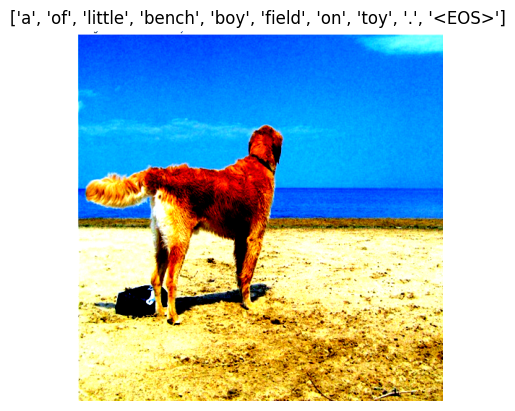

In [6]:
# Turn evaluation mode on
model.eval()

# Test Image 1
test_image1 = test_transform(Image.open("test_examples/dog.jpg").convert("RGB")).unsqueeze(0)

# Predictions
caption = model.caption_image(test_image1.to(device), dataset.vocab)

displayImage(test_image1.squeeze(0), caption)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


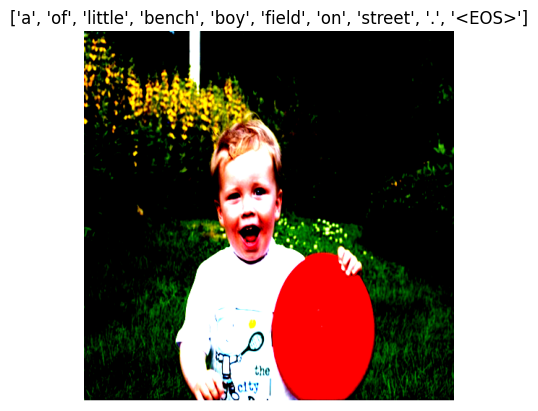

In [7]:
# Test Images 2
test_image2 = test_transform(Image.open("test_examples/child.jpg").convert("RGB")).unsqueeze(0)

caption = model.caption_image(test_image2.to(device), dataset.vocab)

displayImage(test_image2.squeeze(0), caption)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


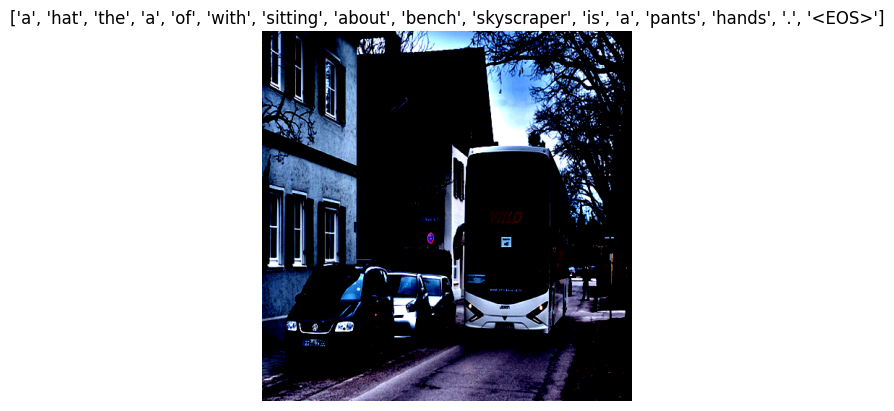

In [10]:
# Test Image 3
test_image3 = test_transform(Image.open("test_examples/bus.png").convert("RGB")).unsqueeze(0)

caption = model.caption_image(test_image3.to(device), dataset.vocab)

displayImage(test_image3.squeeze(0), caption)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


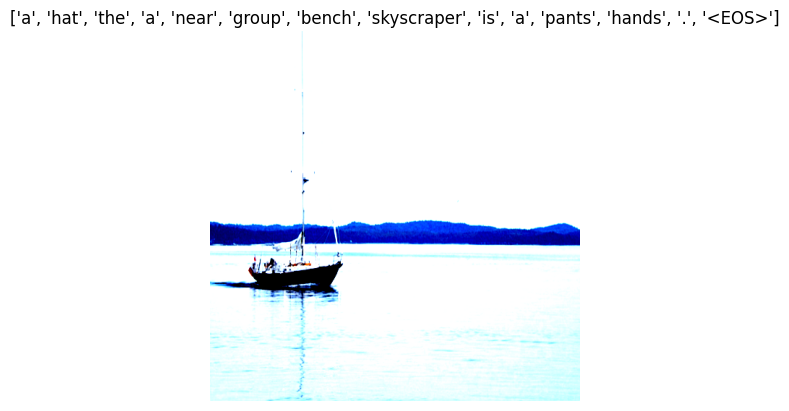

In [11]:
# Test Image 4
test_image4 = test_transform(Image.open("test_examples/boat.png").convert("RGB")).unsqueeze(0)

caption = model.caption_image(test_image4.to(device), dataset.vocab)

displayImage(test_image4.squeeze(0), caption)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


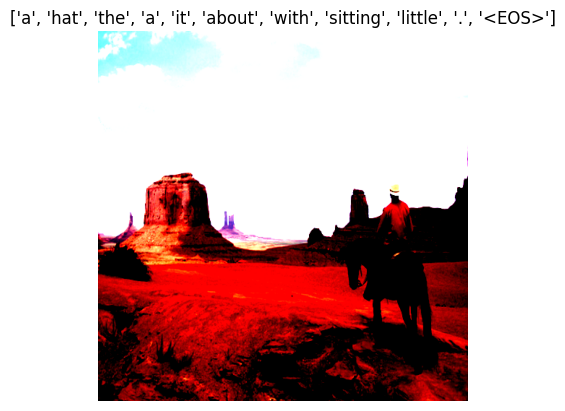

In [12]:
# Test Image 5
test_image5 = test_transform(Image.open("test_examples/horse.png").convert("RGB")).unsqueeze(0)

caption = model.caption_image(test_image5.to(device), dataset.vocab)

displayImage(test_image5.squeeze(0), caption)

In [8]:
j = 1
model.eval()
with torch.inference_mode():
    
    for i, (images, captions) in enumerate(dataloader):
        break
        # Get batch of images and captions
        images, captions = images.to(device), captions.to(device)

        # Make predictions 
        preds = model(images, captions.permute(1,0))
        
        preds = torch.argmax(preds, 2)
        
        # Creates caption of image 'j'
        pred_caption = []
        for i in range(preds.shape[0]):
            pred_caption.append(dataset.vocab.itos[preds[i,j].item()])
        # Display image with predicted caption
        displayImage(images[j].cpu(),pred_caption)
        break

In [7]:
dataset.vocab.stoi['brown']

42

In [19]:
dataset.vocab.itos[1823]

'sideways'

In [10]:
a = torch.rand(4,4)
a

tensor([[0.8054, 0.9299, 0.6396, 0.7705],
        [0.2617, 0.7499, 0.8860, 0.1297],
        [0.4763, 0.1747, 0.9245, 0.5052],
        [0.3100, 0.4576, 0.0422, 0.3642]])

In [11]:
a[1,1] = 0

In [13]:
captions.permute(1,0)[:,1:]

tensor([[   4,  100,  115,    4,    3,   48,   18,  452,    2,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0],
        [ 472,   87,   50,  290, 2401,   13,    3,  123,    4,   96, 1654,  665,
            2,    0,    0,    0,    0,    0,    0,    0,    0],
        [   4,   22,  104,  672, 1097,  101,  557,   51,    4,   22,   46,    4,
           19,   25,  209,   29,    9,  166,    5,    2,    0],
        [   9,  221,  629,    8,    9, 1557,   98,   18,  635,    9,   37, 2988,
           65,    9, 1259,   15,    9,   11,  812,    5,    2],
        [   4,  311,    7,  220,    8,    9,   61,   31,   64,  425,  387,  165,
            5,    2,    0,    0,    0,    0,    0,    0,    0],
        [   4,    7,    3,   29,    9,  525,   13,    4, 1085,    5,    2,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   4,   40,   46,   42,  524,    8,    4,  351,  418,    4,   74,  433,
            5,    2,    0,    0,    0,    0,    0